<a href="https://colab.research.google.com/github/LiterallyRicky/DataScience-A2/blob/main/Rick_RiveU3proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Unit 3 Project: What is the true average laptop price?**#

Wanna know the true average of laptop prices? **View this!**

Using a dataset of laptops, I'll be trying to predict the true average laptop price!

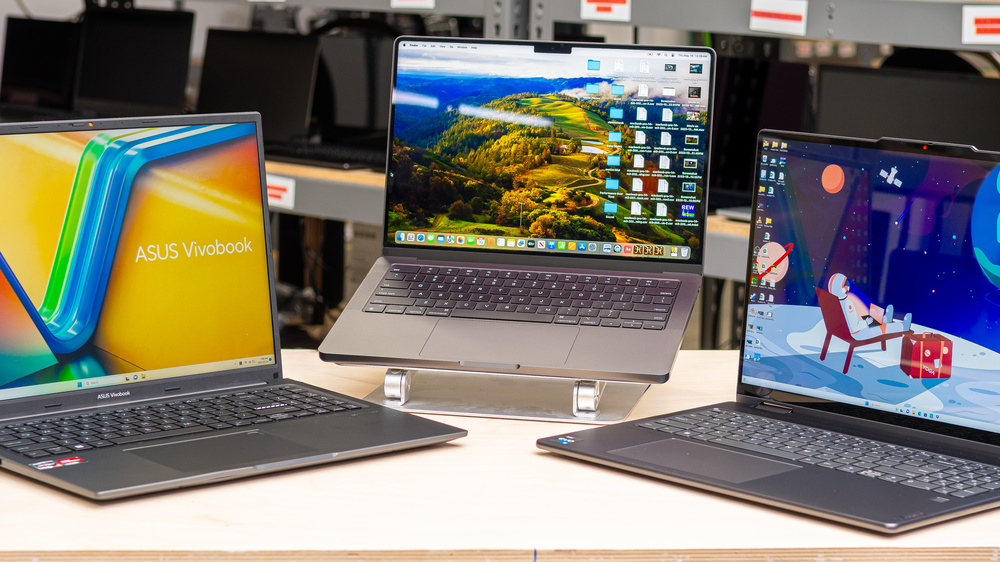

#**Context:**

As mentioned above, the question for this project is "What is the true average laptop price?". Why did I choose this question? To be honest, I love working with technology and laptops for some time now. Due to increasing in prices and inflation, I wanted to see what the average prices for laptops would be now. So I had that in mind for picking my data and I tried to find a dataset that was made this year, just so I could see prices somewhat recently. Also, I just thought it would be interesting :p

**Note on the project/dataset:**

For this project, I used a dataset from [Kaggle](https://www.kaggle.com/datasets/abdelrahmanemad594/laptop-prices) that I found that entails a lot of information for laptops: screen size, ram, cpu, price, etc. In reality, since we're just looking at price, we only need that column, which we'll get in the later on sections.

#**Loading all neccessary libraries:**

Before diving into the project, we must import our libraries like usual.

In [ ]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.

In [ ]:
import preliz as pz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

Woah wow so cool, librariesss.

#**Plotting the dataset!**
This is the section where we get the dataset from Kaggle -> Github -> Colab. Also, this is where I plot the entire dataset and then the price (the section we really need from this dataset.)

In [ ]:
#loading the dataset from Github, dataset from Kaggle
url_laptops = 'https://raw.githubusercontent.com/LiterallyRicky/DataScience-A2/refs/heads/main/Data/Laptop-Price.csv'
#Reads the csv file
data_laptops = pd.read_csv(url_laptops)

In [ ]:
#Models the entirety of the dataset of laptops (1146 laptops)
data_laptops

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Unnamed: 16,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,NaN,575.00
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,NaN,400.00
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,NaN,1495.00
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,NaN,770.00
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,NaN,393.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Dell,Inspiron 3567,Notebook,15.6,1366x768,8GB,Linux,Intel,Core i7 7500U,2.7GHz,0,1,0,0,AMD,Radeon R5 M430,NaN,805.99
1142,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,0,500,0,0,Nvidia,GeForce 920M,NaN,720.32
1143,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,128,0,0,0,Intel,HD Graphics 520,NaN,638.00
1144,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,Windows 10,Intel,Core i7 6500U,2.5GHz,512,0,0,0,Intel,HD Graphics 520,NaN,1499.00


We do not need all the data from this dataset from Kaggle. We just need the prices and convert them to USD, to make it easier.

In [ ]:
#Showcases all the Euro prices of laptops in this dataset
Price1 = data_laptops.Price_euros
Price1

,Price_euros
0,575.00
1,400.00
2,1495.00
3,770.00
4,393.90
...,...
1141,805.99
1142,720.32
1143,638.00
1144,1499.00


Cool! We got the prices for the laptops. Now, we just need to convert to USD.

In [ ]:
#as of today: Oct. 2, 2024, the current exchange rate from Euros to USD is 1.1.
exchange_rate = 1.10
#defining price in usd to be price_euros multiplied by the exchange rate
data_laptops['Price_usd'] = data_laptops['Price_euros'] * exchange_rate

In [ ]:
Price2 = data_laptops.Price_usd
Price2

,Price_usd
0,632.500
1,440.000
2,1644.500
3,847.000
4,433.290
...,...
1141,886.589
1142,792.352
1143,701.800
1144,1648.900


Nice! Manipulating the dataset to get USD price instead of Euros gives me, a fellow American, a better way to look at this instead of Euros. Sorry EU countries.

#**Priors + Likelihood:**
Plotting our histograms of our raw data + determining and plotting our priors!

Before we start with our priors, let's plot histograms of our raw data.

(array([414., 397., 206.,  82.,  36.,   5.,   3.,   1.,   1.,   1.]),
 array([ 265. ,  848.4, 1431.8, 2015.2, 2598.6, 3182. , 3765.4, 4348.8,
        4932.2, 5515.6, 6099. ]),
 <BarContainer object of 10 artists>)

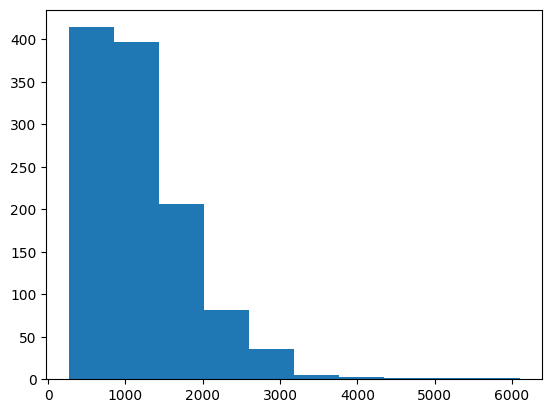

In [ ]:
#plotting histogram of the Euro prices
plt.hist(Price1)

**Note:**

We can see that the histogram is really skewed right. This makes sense since a lot of the data of our laptops are between the prices of ~ €300/400 to €1500, which is reasonable for a laptop price. This also means that the mean is close around €900(?), just an educated guess from viewing this histogram.

I'll plot the Price2 Histogram (Prices in USD) as well, but they should match up together well. "Match up together well." - I basically mean the exact same but shifted to the right SLIGHTLY, the prices are increasing since it's being multiplied by 1.1.

(array([414., 397., 206.,  82.,  36.,   5.,   3.,   1.,   1.,   1.]),
 array([ 291.5 ,  933.24, 1574.98, 2216.72, 2858.46, 3500.2 , 4141.94,
        4783.68, 5425.42, 6067.16, 6708.9 ]),
 <BarContainer object of 10 artists>)

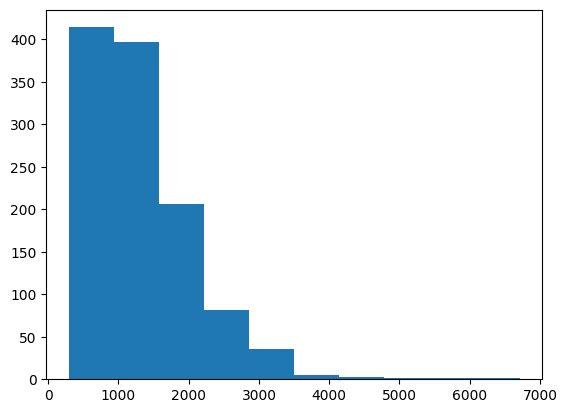

In [ ]:
#plotting histogram of the USD prices
plt.hist(Price2)

Since we have the histogram of all of our values, I don't really know the exact values of the lowest price and highest price in laptops from our dataset. Sorry but I don't want to scroll through a dataset of 1146 laptops and try to find the lowest and highest value myself so, we're going to use code to get the lowest and highest price.

In [ ]:
min_price = data_laptops['Price_usd'].min()
max_price = data_laptops['Price_usd'].max()

print(f"Lowest price: {min_price}")
print(f"Highest price: {max_price}")

Lowest price: 291.5
Highest price: 6708.900000000001


Now that we know the lowest price for a laptop in our dataset is ~292 dollars and the highest price for a laptop in our dataset is ~6909 dollars, we can make a uniform distribution for a uniform prior.

<Axes: >

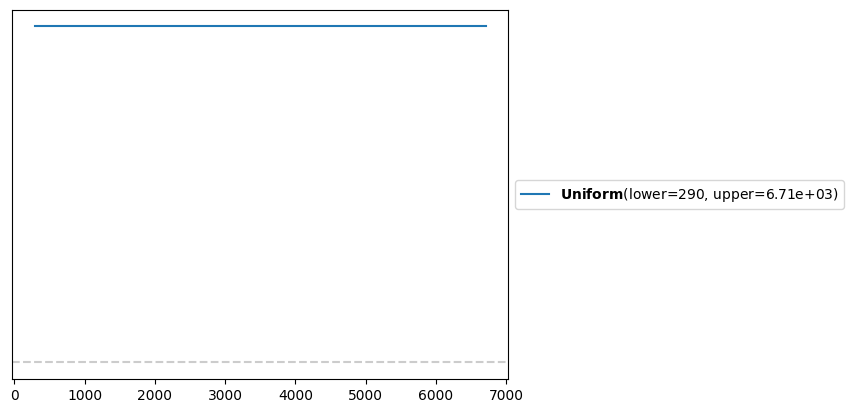

In [ ]:
#290 is a little lower than our lowest price
#6710 is a little bit higher than our highest price
pz.Uniform(290,6710).plot_pdf()

**Note:**
- The uniform prior, the distribution above, is going to be our mean for our data of prices
- If I knew what the mean was, I'd use a different distribution rather than the uniform. Since I don't know, and I only have an estimation, so I'll be using this distribution to find the mean.

<Axes: >

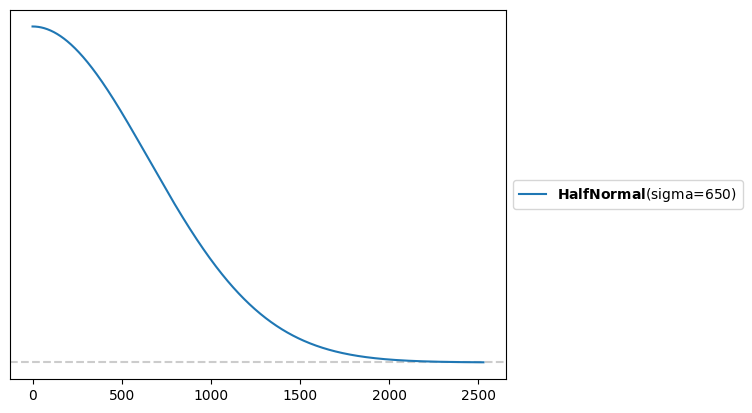

In [ ]:
pz.HalfNormal(sigma = 650).plot_pdf()

**Note:**

- I'm using the HalfNormal distribution for the standard deviation prior since with this distribution, it only shows positive values. Standard deviation should be always positive so this distributions suits that.
- I've set the sigma equal to 650. Why? As an estimation, I think that the standard deviation for the data is close to 600/700(?) just because of the large range that I have and since there's values mainly in the thousands.

#**Likelihood + Posterior**:

Next, by creating the priors for the likelihood and the posterior, now we can plot the posterior and create the ppc model further on.  

In [ ]:
with pm.Model() as model_data_laptops:
    #Again, I'm estimating where the mean might be but I'm not too sure
    #uniform prior made is labeled below
    μ = pm.Uniform('μ', lower=290, upper=6710)

    #standard deviation prior
    σ = pm.HalfNormal('σ', sigma=650)

    #likelihood combining both the mean and sd distributions
    Y = pm.Normal('Y', mu = μ, sigma = σ, observed=Price2)
    p_data_laptops = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

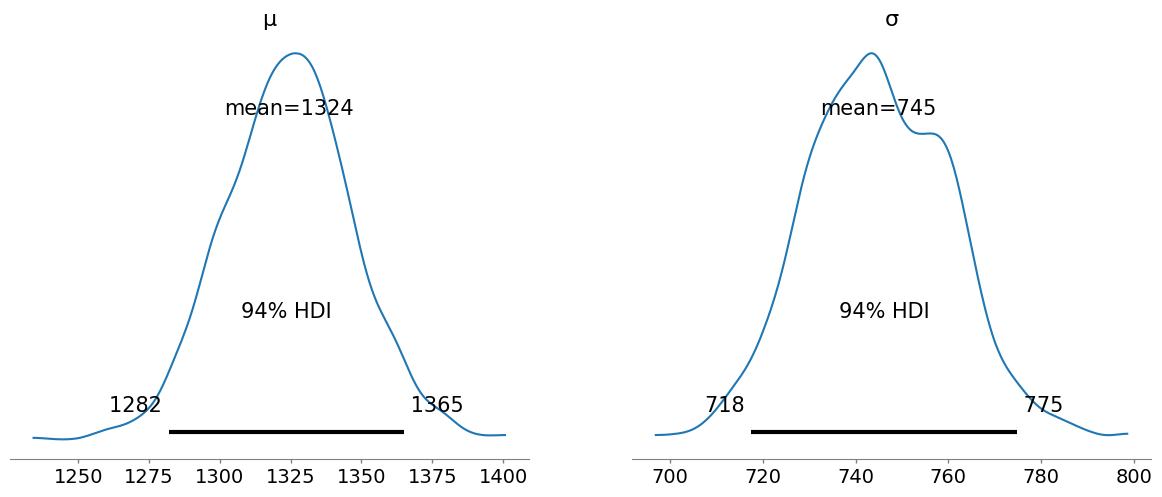

In [ ]:
#posterior for our combined priors
az.plot_posterior(p_data_laptops)

**Note about PYMC:**

With our two dimensional posterior, we can see that:

$μ$ model:
- We have a mean of 1326 with a range of 1279 to 1362 with a 94% confidence level. This means that the mean price of our data is in between the interval of (1279,1362) and that we're 94% confident in that. 1326 is likely the mean price in our data.

$σ$ model:
- In our standard deviation model, we're 94% confident that our SD is between the interval (714,773). Again, 745 is likely the standard deviation.


array([[<Axes: >, None],
       [<Axes: xlabel='μ', ylabel='σ'>, <Axes: >]], dtype=object)

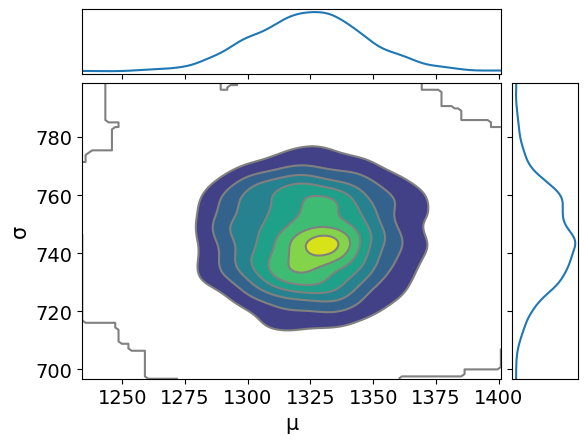

In [ ]:
#modeling both distributions together as a 'pair'
az.plot_pair(p_data_laptops, kind='kde', marginals=True)

The above shows which pair our model prefers more.

The final things to do is finding our ppc in the following section.

#**PPC + Comments:**

**First Graph**

Without any alters yet and just plotting the posteriors as they are, our graph looks like this:

In [ ]:
pm.sample_posterior_predictive(p_data_laptops, model=model_data_laptops, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

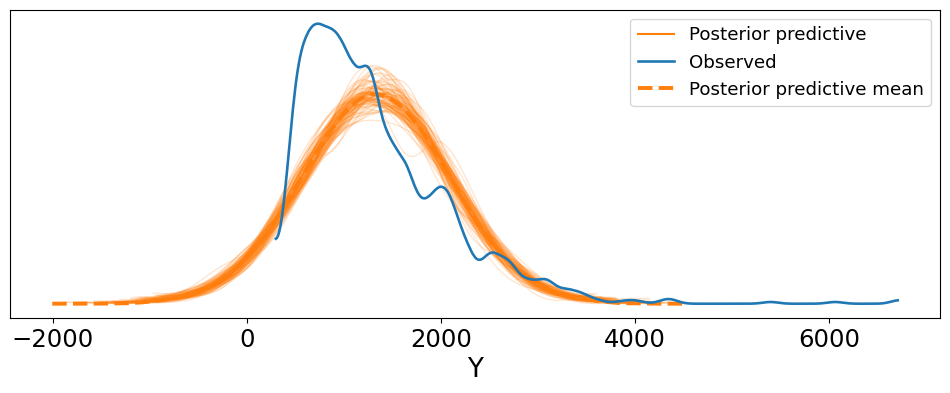

In [ ]:
az.plot_ppc(p_data_laptops, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

This is the first time ppc model that I created. This model does not represent the laptop price data well at all. It needs normality to be incorparted to represent it well. In the next model I'll be creating, I'll be adding normality in my model. Also, some of the data is below the lowest value in the dataset and beyond 0, in the negatives. We have to change that since none of our data are in the negatives.

**Graph 2: Added T distribution + Exponential for Normality**

In [ ]:
with pm.Model() as model_laptopsT:
    #same as before
    μ = pm.Uniform('μ', lower=290, upper=6710)

    #standard deviation prior
    σ = pm.HalfNormal('σ', sigma=650)

    #this is the normality parameter; lam = 1/300000 to try to make it somewhat more normal
    ν = pm.Exponential('ν', lam = 1/300000)

    #likelihood combining both the mean and sd distributions
    #replaced pm.Normal to pm.StudentT
    Y = pm.StudentT('Y', mu = μ, sigma = σ, nu = ν, observed=Price2)
    p_data_laptopsT = pm.sample()

Output()

Output()

In [ ]:
pm.sample_posterior_predictive(p_data_laptopsT, model=model_laptopsT, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(290.0, 6710.0)

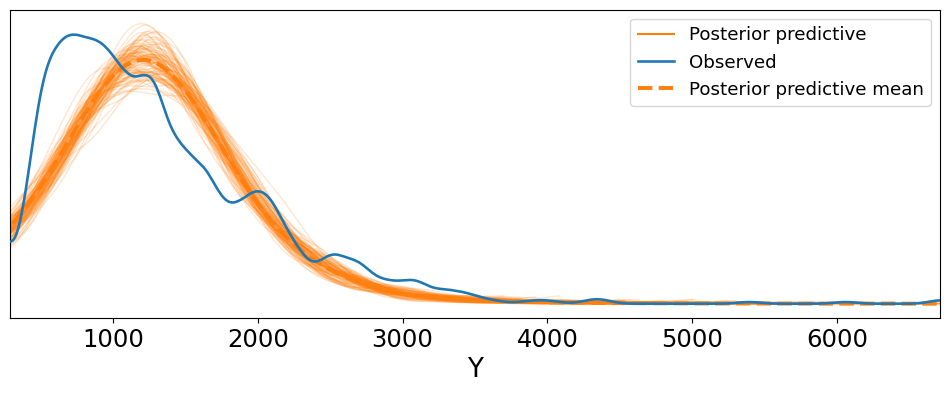

In [ ]:
ax = az.plot_ppc(p_data_laptopsT, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
#setting limits to constrain from lowest to highest value
ax.set_xlim(290, 6710)

Now, we excluded the values in the negatives. But it's still not modeling the laptop price data set well. The right side of the tail is similar but the peak of the distribution doesn't match. Since we care about skewness in our graph and that it's positively skewed, we should try more skew distributions.

**Graph 3: Changed T distribution to SkewNormal distribution**

In [ ]:
with pm.Model() as model_laptopsS:
    #same as before
    μ = pm.Uniform('μ', lower=290, upper=6710)

    #standard deviation prior
    σ = pm.HalfNormal('σ', sigma=650)

    #this is our normality parameter
    α = pm.Exponential('α', lam = 1/30)

    #likelihood combining both the mean and sd distributions
    #replaced pm.StudentT with pm.SkewNormal
    Y = pm.SkewNormal('Y', mu = μ, sigma = σ, alpha = α, observed=Price2)
    p_data_laptopsS = pm.sample()

Output()

Output()

In [ ]:
pm.sample_posterior_predictive(p_data_laptopsS, model=model_laptopsS, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

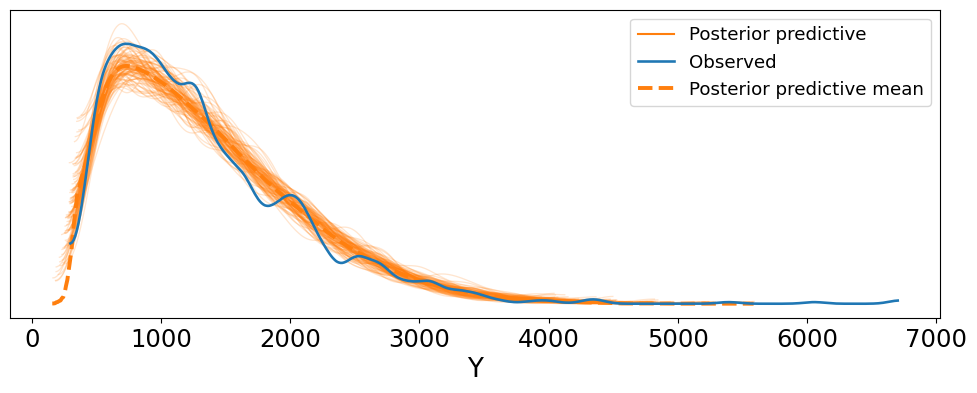

In [ ]:
#plotting the model created above
az.plot_ppc(p_data_laptopsS, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Now, the observed is actually matched up *somewhat well* (thankfully)! I could definitely try something else to make the observed line to match with the posterior predictive mean line. However, the general shape is there! The next following graphs are trying to get the graph matched up better. *If it doesn't go well, then this is the best graph I tried and matched the best.*

**Graph 4: Changed SkewNormal distribution to SkewT distribution**

In [ ]:
with pm.Model() as model_laptopsST:
    #same as before
    μ = pm.Uniform('μ', lower=290, upper=6710)

    #standard deviation prior
    σ = pm.HalfNormal('σ', sigma=650)

    #a > b = positive skew, which is what we have.
    #made sigma = 1000 in a just to see what happens and b/c it's really positively skewed.
    a = pm.HalfNormal('a', sigma=1000)
    b = pm.HalfNormal('b', sigma=5)

    #likelihood combining both the mean and sd distributions
    Y = pm.SkewStudentT('Y', mu = μ, sigma = σ, a=a, b=b, observed=Price2)
    p_data_laptopsST = pm.sample()

Output()

Output()

In [ ]:
pm.sample_posterior_predictive(p_data_laptopsST, model=model_laptopsST, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(290.0, 6710.0)

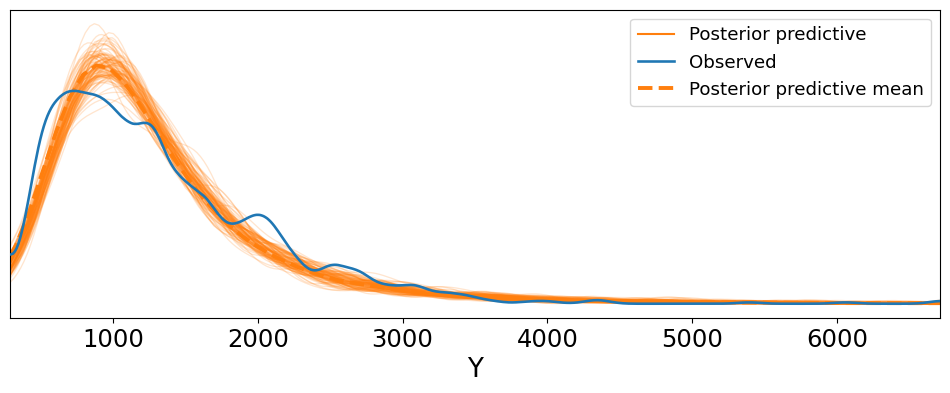

In [ ]:
ax = az.plot_ppc(p_data_laptopsST, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
ax.set_xlim(290, 6710)

Hm... I mean it's better than Graph 1 but not better than Graph 3. The peak is not matched up entirely and only parts are matched up with the distribution's tail.

**Graph 5: Changed SkewStudentT to Gamma**

In [ ]:
with pm.Model() as model_laptopsG:
    #same as before
    μ = pm.Uniform('μ', lower=290, upper=6710)

    #standard deviation prior
    σ = pm.HalfNormal('σ', sigma=650)

    #this is our normality parameter
    b = pm.Exponential('α', lam = 1/3)

    #likelihood combining both the mean and sd distributions
    #replaced pm.StudentT with pm.Gamma
    Y = pm.Gamma('Y', mu = μ, sigma = σ, alpha = b, observed=Price2)
    p_data_laptopsG = pm.sample()

Output()

Output()

In [ ]:
pm.sample_posterior_predictive(p_data_laptopsG, model=model_laptopsG, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(290.0, 6710.0)

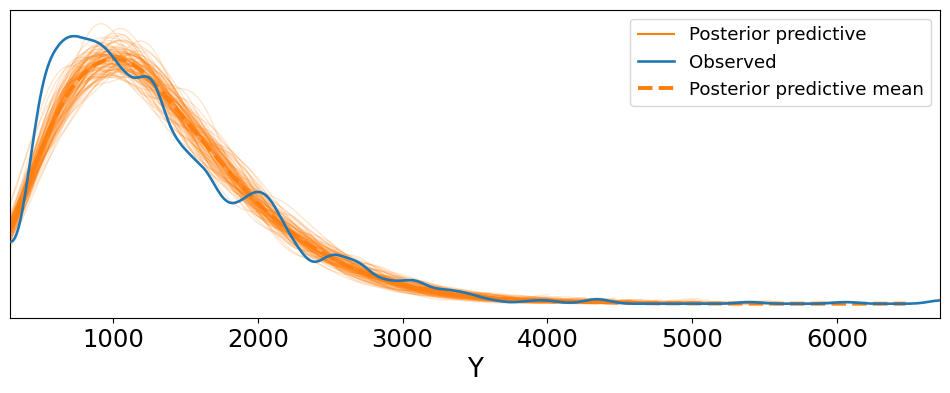

In [ ]:
ax = az.plot_ppc(p_data_laptopsG, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
ax.set_xlim(290, 6710)

Alright this isn't too bad, and it somewhat matches the posterior predictive mean. However, my own intuition thinks that I could model it even better. So I'll try to change the Gamma distribution to ExGaussian. **P.S. Mr. Arredondo told me to see what'd happen if I did this; so, I'm trying it!**

**Graph 6: Changed Gamma to ExGaussian**

In [ ]:
with pm.Model() as model_laptopsEG:
    #same as before
    μ = pm.Uniform('μ', lower=290, upper=6710)

    #standard deviation prior
    σ = pm.HalfNormal('σ', sigma=650)

    ν = pm.Exponential('ν', lam = 1/30000)

    #likelihood combining both the mean and sd distributions
    #replaced pm.StudentT with pm.ExGaussian
    Y = pm.ExGaussian('Y', mu = μ, sigma = σ, nu = ν, observed=Price2)
    p_data_laptopsEG = pm.sample()

Output()

Output()

In [ ]:
pm.sample_posterior_predictive(p_data_laptopsEG, model=model_laptopsEG, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(290.0, 6710.0)

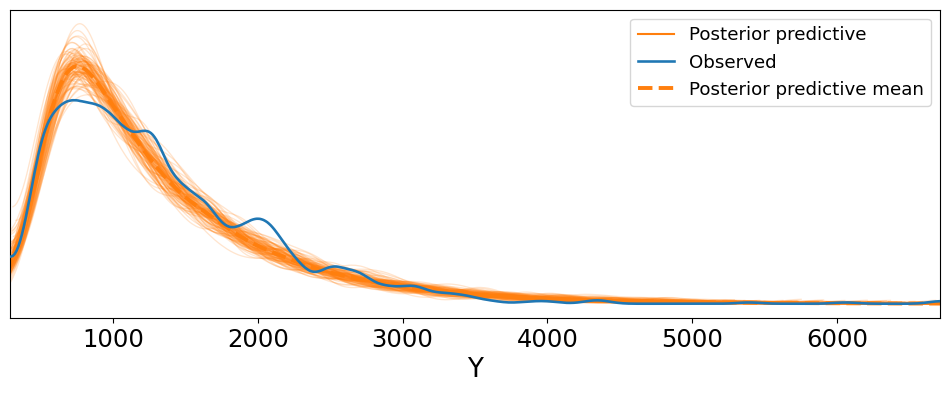

In [ ]:
ax = az.plot_ppc(p_data_laptopsEG, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
ax.set_xlim(290, 6710)

-----------------------------------------------------------------------------

**Some Final Comments:**

The likelihood (Skewnormal) that I used in this model compared to others was what I think really made the model work well. Since the histograms and the first PPC model seemed normal but with the lack of symmetry, the Skewnormal is great for fitting data exactly like the one the histograms displayed.


One big thing that I noticed between all these graphs is the similarity in peaks. All distributions/graphs have similar shapes compared to one another. The graph that graphed well on the posterior predictive mean line was **Graph 3 (pictured below)**.

<Axes: xlabel='Y'>

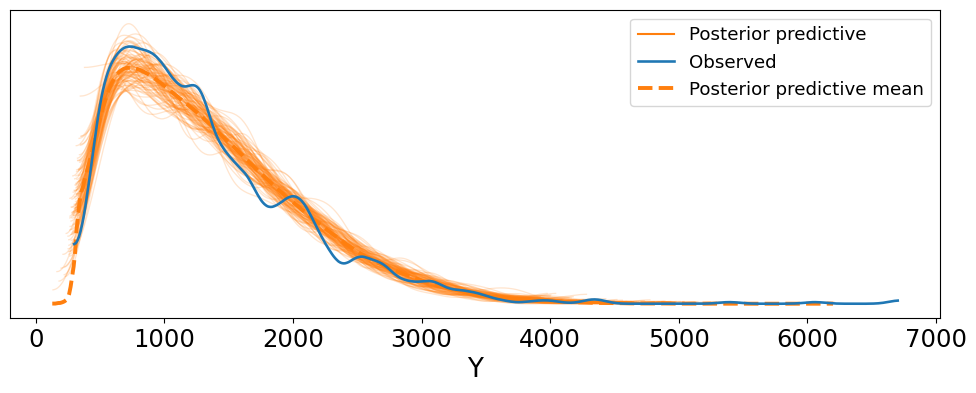

In [ ]:
#plotting the model created above
az.plot_ppc(p_data_laptopsS, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Does it represent reality? I would say so! Looking back to how I said all the distributions have similar shapes, I feel like this gives us an inference that the distributions hold to the raw data histograms. For laptop prices, this graph matches reality really well.

It is uncommon for laptops to be above 2000 dollars unless they're high-end with the newest computer components. For a laptop price distribution that has a peak below and near 1000 dollars, this makes reasonable sense, which is one of the main reasons why I've chosen this graph compared to others. Then of course, the higher the price goes, the number of laptops decreases. Nonetheless, this is the distribution that showcases the true average of laptop prices, where the mean is close to $1200!